# Crop Disease Prediction  

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random

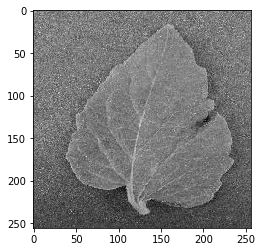

In [2]:
DATADIR = "/home/rahul/Desktop/kibbutz-predict/datasets"
CATEGORIES = ["leaf-mold", "yellow-leaf-curl-virus"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap="gray")
        plt.show()
        break
    break
    
# print(img_arr) 

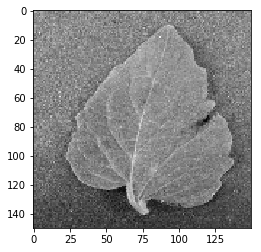

In [3]:
IMG_SIZE = 150

new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap="gray")
plt.show()

In [4]:
train_data = []

def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_arr, class_num])
            except Exception as e:
                pass
            

create_train_data()

In [5]:
print(len(train_data))

3000


In [6]:
random.shuffle(train_data)

In [7]:
X = []
y = []

In [8]:
for features, labels in train_data:
    X.append(features)
    y.append(labels)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
len(X)

3000

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X = X/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


model.fit(X, y, batch_size=10, epochs=3, validation_split=0.1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 2700 samples, validate on 300 samples
Epoch 1/3
2700/2700==============================] - 92s 34ms/sample - loss: 0.3768 - acc: 0.8811 - val_loss: 0.0901 - val_acc: 0.9633
Epoch 2/3
2700/2700==============================] - 95s 35ms/sample - loss: 0.0522 - acc: 0.9811 - val_loss: 0.0644 - val_acc: 0.9800
Epoch 3/3
2700/2700==============================] - 92s 34ms/sample - loss: 0.0941 - acc: 0.9667 - val_loss: 0.1788 - val_acc: 0.9367


In [1]:
import keras

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/rahul/anaconda3/lib/python3.7/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/home/rahul/anaconda3/lib/python3.7/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: /home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so: invalid ELF header


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
 from tensorflow.python.pywrap_tensorflow_internal import *

ImportError: Traceback (most recent call last):
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/rahul/anaconda3/lib/python3.7/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/home/rahul/anaconda3/lib/python3.7/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: /home/rahul/.local/lib/python3.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so: invalid ELF header


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.